In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.graph_objects as go

import re

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

# Tum data 

In [2]:
df = pd.read_csv('merged_satis_uretim_data_27_Ekim.csv')
df

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,7/18/2018,NaN,NaN,NaN,NaN,NaN
1,AMELIYAT MASASI,DEMO,2018/007,2/14/2018,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN,NaN,NaN,NaN
2,AMELIYAT MASASI,ÖZEL,2018/008,10/23/2018,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR KATİP ÇELEBİ ÜNİVERSİTESİ,İZMİR,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-029,DERHAL,NaN,NaN,NaN,NaN,NaN,NaN
3,AMELIYAT MASASI,YURTDIŞI,2018/009,9/3/2018,COOL DEE PA ELEKTRIC CO LTD.,COOL DEE PA ELEKTRIC CO LTD.,TAYLAND,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-022,7 GÜN,9/7/2018,NaN,NaN,NaN,NaN,NaN
4,AMELIYAT MASASI,YURTDIŞI,2018/011,2/28/2018,YÜKSELİŞ,DR.ORUC IBADOV,AZERBEYCAN,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-004,8 GÜN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32641,OKSIJEN,YURTDIŞI,2022/364,2/2/2022,IRAK,IRAK,IRAK,GOLDBERG 22 V,22 OKSİJEN ÜRETİM SİSTEMİ,NaN,2022/06-006,267,10/27/2022,NaN,NaN,NaN,NaN,NaN
32642,OKSIJEN,YURTDIŞI,2022/156,2/27/2024,CEZAYİR,CEZAYİR,CEZAYİR,OXY-GOLD 37,OXY-GOLD 37 OKSİJEN ÜRETİM VE DEPOLAMA SİSTEMİ,NaN,2024/06-001,60 gün,3/11/2024,NaN,NaN,NaN,NaN,8697610000000.000
32643,OKSIJEN,YURTDIŞI,2022/161,3/3/2022,STOK,STOK,STOK,OXY-GOLD 30,OXY-GOLD 30 OKSİJEN ÜRETİM VE DEPOLAMA SİSTEMİ,NaN,2024/06-003,60 gün,3/12/2024,NaN,NaN,NaN,NaN,8697610000000.000
32644,OKSIJEN,YURTDIŞI,2022/163,6/11/2024,CEZAYİR,CEZAYİR,CEZAYİR,OXY-GOLD 30,OXY-GOLD 30 OKSİJEN ÜRETİM VE DEPOLAMA SİSTEMİ,NaN,2024/06-005,60 gün,6/13/2024,NaN,NaN,NaN,NaN,8697610000000.000


# bu koddan sonra YALNIZCA KARTUS URUNU ile devam edilecek 

In [3]:
kartus = df[df['kategori'] == 'KARTUS'].reset_index(drop=True)
kartus

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
0,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,KARTUŞ,NaN,2018/07-0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,KARTUŞ,NaN,2018/07-0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,KARTUŞ,NaN,2018/07-0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,KARTUŞ,NaN,2018/07-0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,KARTUŞ,NaN,2018/07-0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30121,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30122,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30123,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30124,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# URUN_ADI SUTUNU

## KARTUS urunu ozelinde tek tip urun adi vardir o da KARTUS' tur. 'kategori' ve 'urun_adi' sutunlari birebir aynidir. Bu nedenle 'urun_adi'  sutunu drop edilecektir.

In [4]:
kartus = kartus.drop(['urun_adi'], axis=1)
kartus

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
0,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,NaN,2018/07-0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,NaN,2018/07-0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,NaN,2018/07-0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,NaN,2018/07-0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,NaN,2018/07-0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30121,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30122,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30123,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30124,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# siparis_no - siparis_veren - siparis_tarihi  isimli sutunlarin bos oldugu satirlar SATISA ait bilgi icermediginden bu satirlarin SILINMESI GEREKIR.

In [5]:
kartus[kartus['siparis_no'].isnull() & kartus['siparisi_veren'].isnull() & kartus['siparis_tarihi'].isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
1775,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018/07-1767,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN
1776,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018/07-1768,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN
1777,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018/07-1769,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN
1778,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018/07-1770,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN
3387,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019/07-1572,NaN,NaN,NaN,NaN,25.4.2019-HPS2019-00387,4/29/2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30121,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6996,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30122,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30123,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30124,KARTUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/07-6999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
kartus = kartus[~(kartus['siparis_no'].isnull() & kartus['siparisi_veren'].isnull() & kartus['siparis_tarihi'].isnull())]
kartus

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
0,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,NaN,2018/07-0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,NaN,2018/07-0002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,NaN,2018/07-0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,NaN,2018/07-0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,NaN,AKSARAY,NaN,NaN,2018/07-0005,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28876,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,NaN,ANKARA,NaN,NaN,2024/07-5751,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28877,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,NaN,ANKARA,NaN,NaN,2024/07-5752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28878,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,NaN,ANKARA,NaN,NaN,2024/07-5753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28879,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,NaN,ANKARA,NaN,NaN,2024/07-5754,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# %100 bos olan sutunlari datadan silinmesi gerekiyor

In [7]:
kartus = kartus.drop(['kurulum_yeri', 'urun_modeli', 'litre', 'teslim_suresi', 'irsaliye_tarihi', 'uts_no'], axis=1)
kartus

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,teslim_tarihi,aciklama,solusyon_fatura,bidon_acilisi
0,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0001,NaN,NaN,NaN,NaN
1,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0002,NaN,NaN,NaN,NaN
2,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0003,NaN,NaN,NaN,NaN
3,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0004,NaN,NaN,NaN,NaN
4,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0005,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
28876,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5751,NaN,NaN,NaN,NaN
28877,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5752,NaN,NaN,NaN,NaN
28878,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5753,NaN,NaN,NaN,NaN
28879,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5754,NaN,NaN,NaN,NaN


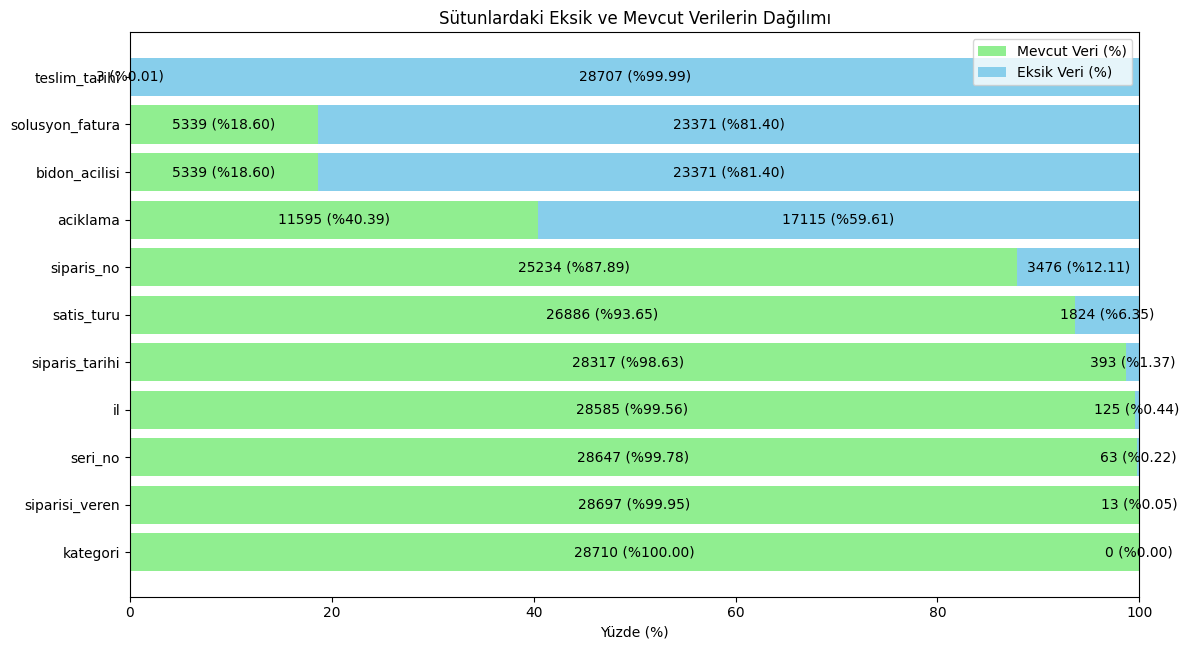

In [8]:
def plot_check_null(data_frame):
    # Null ve mevcut değerleri hesapla
    data_info = {
        'Column': [],
        'Null Count': [],
        'Null Percentage': [],
        'Valid Count': [],
        'Valid Percentage': []
    }

    for col in data_frame.columns:
        null_count = data_frame[col].isnull().sum()
        valid_count = len(data_frame) - null_count
        null_percentage = (null_count / len(data_frame)) * 100
        valid_percentage = 100 - null_percentage
        data_info['Column'].append(col)
        data_info['Null Count'].append(null_count)
        data_info['Null Percentage'].append(null_percentage)
        data_info['Valid Count'].append(valid_count)
        data_info['Valid Percentage'].append(valid_percentage)

    # Veriyi DataFrame'e çevir ve yüzdelere göre sırala
    data_df = pd.DataFrame(data_info)
    data_df = data_df.sort_values(by='Null Percentage', ascending=False)

    # Grafik oluştur
    fig, ax = plt.subplots(figsize=(12, len(data_df) * 0.6))  # Dinamik yükseklik

    # Eksik ve mevcut değerleri gösterecek stacked barh çubukları çiz
    ax.barh(data_df['Column'], data_df['Valid Percentage'], color='lightgreen', label='Mevcut Veri (%)')
    ax.barh(data_df['Column'], data_df['Null Percentage'], left=data_df['Valid Percentage'], color='skyblue', label='Eksik Veri (%)')
    
    # Yatay eksen ve başlık
    ax.set_xlabel('Yüzde (%)')
    ax.set_title("Sütunlardaki Eksik ve Mevcut Verilerin Dağılımı")

    # Her çubuğun yanına sayısal değerleri ekle
    for i, (null_count, null_percentage, valid_count, valid_percentage) in enumerate(zip(
            data_df['Null Count'], data_df['Null Percentage'], data_df['Valid Count'], data_df['Valid Percentage'])):
        # Mevcut veri sayısı ve yüzdesi
        ax.text(valid_percentage / 2, i, f'{valid_count} (%{valid_percentage:.2f})', ha='center', va='center', color='black')
        # Eksik veri sayısı ve yüzdesi
        ax.text(valid_percentage + (null_percentage / 2), i, f'{null_count} (%{null_percentage:.2f})', ha='center', va='center', color='black')

    plt.gca().invert_yaxis()  # Sıralamayı yukarıdan aşağıya doğru yap
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Örnek kullanım (data_frame adında bir DataFrame'iniz olduğunu varsayıyoruz)
plot_check_null(kartus)

# TESLIM TARIHI SUTUNU

In [9]:
kartus[kartus['teslim_tarihi'].notna()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,teslim_tarihi,aciklama,solusyon_fatura,bidon_acilisi
252,KARTUS,NaN,2018/015,2/6/2018,FATİH SULTAN MEHMET EĞİTİM VE ARAŞTIRMA HASTA...,İSTANBUL,2018/07-253,380-TL,SATIŞ,NaN,NaN
282,KARTUS,NaN,2018/016,2/7/2018,SURUÇ DEVLET HASTANESİ,ŞANLIURFA,2018/07-283,YUSUF BAYRAMA VERİLDİ.,DEMO,NaN,NaN
283,KARTUS,NaN,2018/016,2/7/2018,SURUÇ DEVLET HASTANESİ,ŞANLIURFA,2018/07-284,YUSUF BAYRAMA VERİLDİ.,DEMO,NaN,NaN


In [10]:
kartus.loc[kartus['teslim_tarihi'] == '380-TL', 'satis_turu'] = kartus.loc[kartus['teslim_tarihi'] == '380-TL', 'aciklama']
kartus.loc[kartus['teslim_tarihi'] == 'YUSUF BAYRAMA VERİLDİ.', 'satis_turu'] = kartus.loc[kartus['teslim_tarihi'] == 'YUSUF BAYRAMA VERİLDİ.', 'aciklama']

## 'teslim_tarihi' isimli sutunda not null olan 3 satirda deger var idi. Geri kalan 28707 satirda 'teslim_tarihi' isimli sutun NaN deger. Null olmayan yerlerdeki bilgi 'satis_turu' sutununa entegre edildi. 'teslim_tarihi' sutundaki gerekli bilgi alinip KATEGORI datasindan cikartilmistir.

In [11]:
kartus = kartus.drop(['teslim_tarihi'], axis=1)
kartus

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,aciklama,solusyon_fatura,bidon_acilisi
0,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0001,NaN,NaN,NaN
1,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0002,NaN,NaN,NaN
2,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0003,NaN,NaN,NaN
3,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0004,NaN,NaN,NaN
4,KARTUS,NaN,2018/001,NaN,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0005,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
28876,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5751,NaN,NaN,NaN
28877,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5752,NaN,NaN,NaN
28878,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5753,NaN,NaN,NaN
28879,KARTUS,İHALE,2024/123,9/11/2024 0:00,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5754,NaN,NaN,NaN


# SIPARIS VEREN SUTUNU

## NULL DEGERLERIN DOLDURULMASI YADA DROP EDILMESI ISLEMLERI 

In [12]:
kartus[kartus.siparisi_veren.isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,aciklama,solusyon_fatura,bidon_acilisi
1774,KARTUS,NaN,2018/096,NaN,NaN,UKRAYNA,2018/07-1766,SATIŞ,NaN,NaN
11491,KARTUS,NaN,AKMIŞ KARTUŞ İPTAL OLDU.,NaN,NaN,NaN,2021/07-4322,NaN,NaN,NaN
18389,KARTUS,ARIZALI,2023/48,NaN,NaN,NaN,2023/07-1265,ARIZALI,NaN,NaN
26551,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3422,NaN,NaN,NaN
26552,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3423,NaN,NaN,NaN
26553,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3424,NaN,NaN,NaN
26554,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3425,NaN,NaN,NaN
26555,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3426,NaN,NaN,NaN
26556,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3427,NaN,NaN,NaN
26557,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3428,NaN,NaN,NaN


In [13]:
kartus = kartus[~((kartus['siparis_no'] == 'AKMIŞ KARTUŞ İPTAL OLDU.') | (kartus['satis_turu'] == 'ARIZALI'))]

In [14]:
kartus[kartus.siparisi_veren.isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,aciklama,solusyon_fatura,bidon_acilisi
1774,KARTUS,NaN,2018/096,NaN,NaN,UKRAYNA,2018/07-1766,SATIŞ,NaN,NaN
26551,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3422,NaN,NaN,NaN
26552,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3423,NaN,NaN,NaN
26553,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3424,NaN,NaN,NaN
26554,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3425,NaN,NaN,NaN
26555,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3426,NaN,NaN,NaN
26556,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3427,NaN,NaN,NaN
26557,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3428,NaN,NaN,NaN
26558,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3429,NaN,NaN,NaN
26559,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3430,NaN,NaN,NaN


In [15]:
kartus.loc[kartus['siparis_no'] == '2018/096', 'satis_turu'] = 'YURTDIŞI'
kartus.loc[kartus['siparis_no'] == '2018/096', 'siparis_tarihi'] = '12/14/2018'
kartus.loc[kartus['siparis_no'] == '2018/096', 'siparisi_veren'] = 'MME LLC'

### silinmesi gereken satirlar

In [16]:
#SIPARISIN KIMIN TARAFINDAN VERILDIGI VE HANGI ILE GONDERILDIGI BILINMEDIGINDEN SILINMESI GEREKEN SATIRLARDIR VE SILINMISTIR
kartus[(kartus['satis_turu'] == 'YURTDIŞI') & (kartus['il'] != 'YURTDIŞI') & (kartus['siparisi_veren'] != 'YURTDIŞI') &  (kartus['siparisi_veren'].isnull())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,aciklama,solusyon_fatura,bidon_acilisi
26551,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3422,NaN,NaN,NaN
26552,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3423,NaN,NaN,NaN
26553,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3424,NaN,NaN,NaN
26554,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3425,NaN,NaN,NaN
26555,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3426,NaN,NaN,NaN
26556,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3427,NaN,NaN,NaN
26557,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3428,NaN,NaN,NaN
26558,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3429,NaN,NaN,NaN
26559,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3430,NaN,NaN,NaN
26560,KARTUS,YURTDIŞI,2024/75,6/3/2024 0:00,NaN,NaN,2024/07-3431,NaN,NaN,NaN


In [17]:
rows_to_delete = kartus[(kartus['satis_turu'] == 'YURTDIŞI') & 
                        (kartus['il'] != 'YURTDIŞI') & 
                        (kartus['siparisi_veren'] != 'YURTDIŞI') &  
                        (kartus['siparisi_veren'].isnull())].index

# Belirtilen indeksleri kartus DataFrame'inden sil
kartus.drop(rows_to_delete, inplace=True)

## islem yapilmasi gereken satirlar

In [18]:
kartus[kartus['siparisi_veren'] == 'YURTDIŞI CİHAZ İÇİN VERİLEN']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,aciklama,solusyon_fatura,bidon_acilisi
1668,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,SLOVAKYA,2018/07-1660,SATIŞ,NaN,NaN
1669,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,SLOVAKYA,2018/07-1661,SATIŞ,NaN,NaN
1670,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,SLOVAKYA,2018/07-1662,SATIŞ,NaN,NaN
1671,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,SLOVAKYA,2018/07-1663,SATIŞ,NaN,NaN
1672,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,SLOVAKYA,2018/07-1664,SATIŞ,NaN,NaN
1673,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,SLOVAKYA,2018/07-1665,SATIŞ,NaN,NaN
1674,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,SLOVAKYA,2018/07-1666,SATIŞ,NaN,NaN
1675,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,SLOVAKYA,2018/07-1667,SATIŞ,NaN,NaN
1676,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,SLOVAKYA,2018/07-1668,SATIŞ,NaN,NaN
1677,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,SLOVAKYA,2018/07-1669,SATIŞ,NaN,NaN


In [19]:
df[df['il'] == 'SLOVAKYA']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
976,OTOKLAV,YURTDIŞI,2020/489,12/7/2020 0:00,ETKİN TIBBİ CİHAZLAR,SLOVAKYA,SLOVAKYA,GOLDBERG 160 S,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,2020/01-256,5,12/12/2020 0:00,NaN,NaN,NaN,NaN,NaN
977,OTOKLAV,YURTDIŞI,2020/313,12/7/2020 0:00,ETKİN TIBBİ CİHAZLAR,SLOVAKYA,SLOVAKYA,GOLDBERG 160 S,160 LT TEK KAPILI OTOKLAV CİHAZI,160 LT,2020/01-257,5,12/12/2020 0:00,NaN,NaN,NaN,NaN,NaN
3520,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,NaN,SLOVAKYA,NaN,KARTUŞ,NaN,2018/07-1660,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN
3521,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,NaN,SLOVAKYA,NaN,KARTUŞ,NaN,2018/07-1661,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN
3522,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,NaN,SLOVAKYA,NaN,KARTUŞ,NaN,2018/07-1662,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN
3523,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,NaN,SLOVAKYA,NaN,KARTUŞ,NaN,2018/07-1663,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN
3524,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,NaN,SLOVAKYA,NaN,KARTUŞ,NaN,2018/07-1664,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN
3525,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,NaN,SLOVAKYA,NaN,KARTUŞ,NaN,2018/07-1665,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN
3526,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,NaN,SLOVAKYA,NaN,KARTUŞ,NaN,2018/07-1666,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN
3527,KARTUS,NaN,2018/090,11/23/2018,YURTDIŞI CİHAZ İÇİN VERİLEN,NaN,SLOVAKYA,NaN,KARTUŞ,NaN,2018/07-1667,NaN,NaN,NaN,SATIŞ,NaN,NaN,NaN


In [20]:
df[df['il'] == 'SLOVAKYA']['siparisi_veren'].value_counts()

siparisi_veren
YURTDIŞI CİHAZ İÇİN VERİLEN    25
ETKİN TIBBİ CİHAZLAR            4
Name: count, dtype: int64

**SLOVAKYA dan siparisi veren tek bir sirket vardir YURTDIŞI CİHAZ İÇİN VERİLEN degerleri ETKİN TIBBİ CİHAZLAR ile degistirilecektir.**

In [21]:
kartus.loc[kartus['siparisi_veren'] == 'YURTDIŞI CİHAZ İÇİN VERİLEN', 'siparisi_veren'] = 'ETKİN TIBBİ CİHAZLAR'

In [22]:
kartus.siparisi_veren.unique().tolist()

['AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ',
 'BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTANESİ',
 'MUSTAFA TOPÇU (DÖRT YOL)',
 'AYVALIK DEVLET HAST (DEMO)',
 'HİTİT ÜNİVERSİTESİ ÇORUM EROL OLÇOK EĞİTİM ARAŞTIRMA HASTANESİ',
 'ÖZEL GÜLHAN TIP MERKEZİ',
 'KOCAELİ DEVLET HASTANESİ',
 'TOPRAK HOSPİTAL-STERİMED MEDİKAL',
 'MERİVAN IRAK GİDEN CİHAZLARIN İÇİNE KONULDU.',
 'MUSTAFA TOPÇU AKSARAY İÇİN ALDI.',
 'DÜZCE ATATÜRK DEVLET HASTANESİ',
 'FATİH SULTAN MEHMET  EĞİTİM VE ARAŞTIRMA HASTANESİ',
 'SURUÇ DEVLET HASTANESİ',
 'YUSUF BAYRAM STOK',
 'KARS KAĞIZMAN DEVLET HASTANESİ',
 'ANCATECH MEDİKAL-MUŞ BULANIK DEVLET HASTANESİ',
 'ADANA ALTIN KOZA TIP MERKEZİ',
 'BİTLİS TATVAN DEVLET HASTANESİ',
 'HATAY DÖRTYOL DEVLET HASTANESİ',
 'AR-GE ALDI.',
 'METRONİX GÜRCAN BEY AKSARAY İHALESİ NUMUNE İÇİN ALDI',
 'SANCAKTEPE EĞİTİM VE ARAŞTIRMA HASTANESİ',
 'ERBİL ŞİFA ',
 'NİĞDE BOR DEVLET HASTANESİ',
 'DÜZCE İL SAĞLIK MÜDÜRLÜĞÜ-İHALE',
 'BİTLİS İL SAĞLIK MÜDÜRLÜĞÜ',
 'TEST CİHAZI İÇİN VERİLDİ.',
 'STERİ

In [23]:
kartus.siparisi_veren.nunique()

390

# DEVAM ETMEM GEREKEN BIR ALAN 

# il sutnunu dolduracak  kod

In [24]:
import requests

turkiye_iller = [
    "ADANA", "ADIYAMAN", "AFYONKARAHİSAR", "AĞRI", "AMASYA", "ANKARA", "ANTALYA", "ARTVİN", "AYDIN",
    "BALIKESİR", "BİLECİK", "BİNGÖL", "BİTLİS", "BOLU", "BURDUR", "BURSA", "ÇANAKKALE", "ÇANKIRI",
    "ÇORUM", "DENİZLİ", "DİYARBAKIR", "EDİRNE", "ELAZIĞ", "ERZİNCAN", "ERZURUM", "ESKİŞEHİR",
    "GAZİANTEP", "GİRESUN", "GÜMÜŞHANE", "HAKKÂRİ", "HATAY", "ISPARTA", "MERSİN", "İSTANBUL", "İZMİR",
    "KARS", "KASTAMONU", "KAYSERİ", "KIRKLARELİ", "KIRŞEHİR", "KOCAELİ", "KONYA", "KÜTAHYA", "MALATYA",
    "MANİSA", "KAHRAMANMARAŞ", "MARDİN", "MUĞLA", "MUŞ", "NEVŞEHİR", "NİĞDE", "ORDU", "RİZE", "SAKARYA",
    "SAMSUN", "SİİRT", "SİNOP", "SİVAS", "TEKİRDAĞ", "TOKAT", "TRABZON", "TUNCELİ", "ŞANLIURFA", "UŞAK",
    "VAN", "YOZGAT", "ZONGULDAK", "AKSARAY", "BAYBURT", "KARAMAN", "KIRIKKALE", "BATMAN", "ŞIRNAK",
    "BARTIN", "ARDAHAN", "IĞDIR", "YALOVA", "KARABÜK", "KİLİS", "OSMANİYE", "DÜZCE"
]

# Hugging Face API anahtarınızı buraya girin
api_key = "KENDI API KEY INIZI GIRMENIZ GEREK"  

headers = {
    "Authorization": f"Bearer {api_key}"
}

def huggingface_city_lookup(siparisi_veren):
    prompt = f"'{siparisi_veren}' isimli hastane veya şirket hangi şehirde bulunuyor?"
    data = {
        "inputs": prompt,
        "options": {"wait_for_model": True}
    }
    
    response = requests.post(
        "https://api-inference.huggingface.co/models/uer/gpt2-chinese-cluecorpussmall",  # Türkçe modelini kullanın
        headers=headers,
        json=data
    )
    
    if response.status_code == 200:
        prediction = response.json()[0]["generated_text"].strip()
        for il in turkiye_iller:
            if il.lower() in prediction.lower():
                return il
    return None

In [25]:
# 'il' sütunundaki eksik değerleri dolduruyoruz
# Sadece il sütununda NaN olan satırlara fonksiyonu uygula
mask = kartus['il'].isnull()  # NaN olan satırları bulmak için maske oluşturuyoruz
kartus.loc[mask, 'il'] = kartus.loc[mask, 'siparisi_veren'].apply(huggingface_city_lookup)

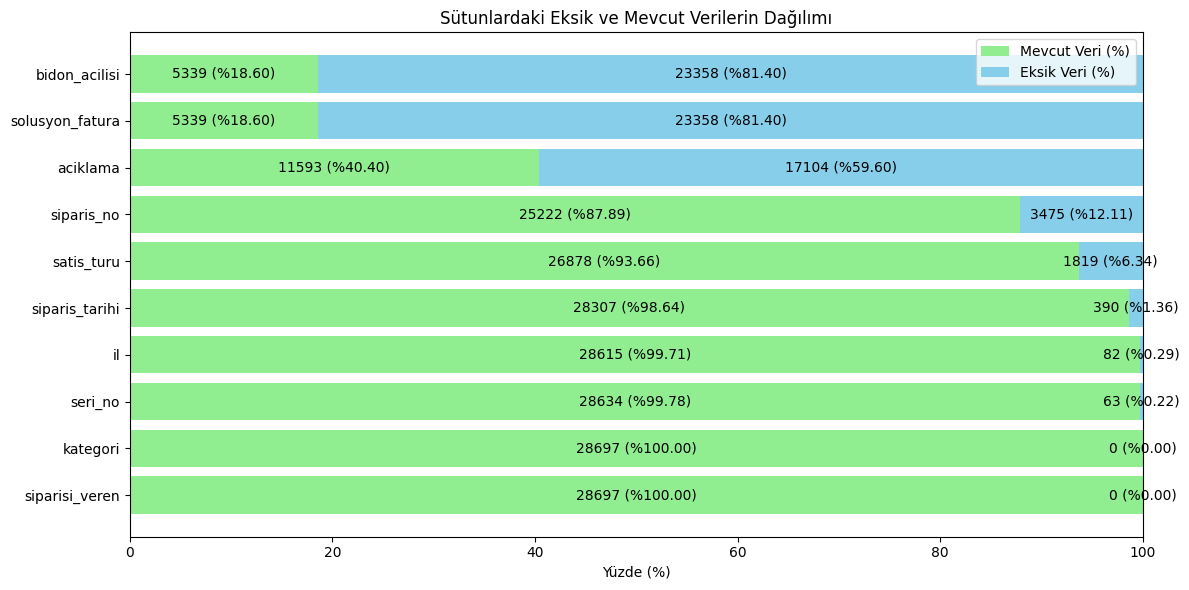

In [26]:
plot_check_null(kartus)

In [27]:
kartus[kartus['il'].isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,aciklama,solusyon_fatura,bidon_acilisi
52,KARTUS,NaN,2018/004,NaN,AYVALIK DEVLET HAST (DEMO),None,2018/07-0053,NaN,NaN,NaN
53,KARTUS,NaN,2018/004,NaN,AYVALIK DEVLET HAST (DEMO),None,2018/07-0054,NaN,NaN,NaN
405,KARTUS,NaN,2018/026,3/13/2018,AR-GE ALDI.,None,*,*,NaN,NaN
431,KARTUS,NaN,2018/031,3/23/2018,ERBİL ŞİFA,None,2018/07-0431,75 USD DEN FATURA EDİLDİ.,NaN,NaN
432,KARTUS,NaN,2018/031,3/23/2018,ERBİL ŞİFA,None,2018/07-0432,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13782,KARTUS,NaN,NaN,NaN,STOK,None,2022/07-2096,ARIZALI,NaN,NaN
13790,KARTUS,NaN,NaN,NaN,STOK,None,2022/07-2104,ARIZALI,NaN,NaN
13819,KARTUS,NaN,NaN,NaN,STOK,None,2022/07-2133,ARIZALI,NaN,NaN
13855,KARTUS,NaN,NaN,NaN,STOK,None,2022/07-2169,ARIZALI,NaN,NaN


In [28]:
#il sutunundaki null degerler uzerinden fark edilen, silinmesi ve ya degisiklik yapilmasi gereken satirlar

satis_turu_sil = ["TEST", "SERVİS"]
siparisi_veren_sil = [
    "AYVALIK DEVLET HAST (DEMO)", 
    "AR-GE ALDI.", 
    "TEST CİHAZI İÇİN VERİLDİ.", 
    "MEHMET HOCA TEST EDİYOR.", 
    "MEHMET HOCA CİHAZ DENEMESİ", 
    "EMİN BEYE VERDİM", 
    "BERAT SERVİSTE KULLANILMAK İÇİN GÖNDERİLDİ.",
    "SERVİS BİRİMİNDEN HASAN ABİYE  TESLİM EDİLDİ."
]
aciklama_sil = ["ARIZALI", "NUMUNE"]

# Satırları filtrelemek için koşullar oluşturun
mask = (
    kartus['satis_turu'].isin(satis_turu_sil) |
    kartus['siparisi_veren'].isin(siparisi_veren_sil) |
    kartus['aciklama'].isin(aciklama_sil)
)

# Koşullara uyan satırları kaldırın
kartus = kartus[~mask]

kartus.loc[kartus['siparisi_veren'] == "ELKOM MÜHENDİSLİK", 'il'] = "KOCAELI"
kartus.loc[kartus['siparisi_veren'] == "ERBİL ŞİFA ", 'il'] = "IRAK"

In [29]:
kartus[kartus['il'].isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,aciklama,solusyon_fatura,bidon_acilisi


# KALICI SIPARIS TURU SUTUNU 

In [30]:
# Satırları filtrelemek için koşullar oluşturun
mask = (
    (kartus['satis_turu'] == 'İHALE NUMUNE') | 
    (kartus['satis_turu'] == 'DEĞİŞİM') |
    (kartus['aciklama'] == 'İHALE NUMUNE') | 
    (kartus['aciklama'] == 'DEĞİŞİM')
)

# Koşullara uyan satırları veri çerçevesinden çıkarın
kartus = kartus[~mask]

In [31]:
kartus[(kartus['satis_turu'].isna()) & (kartus['aciklama'].notna())]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,aciklama,solusyon_fatura,bidon_acilisi
166,KARTUS,NaN,2018/012,2/1/2018,MUSTAFA TOPÇU AKSARAY İÇİN ALDI.,AKSARAY,2018/07-167,DEMO,NaN,NaN
167,KARTUS,NaN,2018/012,2/1/2018,MUSTAFA TOPÇU AKSARAY İÇİN ALDI.,AKSARAY,2018/07-168,DEMO,NaN,NaN
168,KARTUS,NaN,2018/013,2/6/2018,DÜZCE ATATÜRK DEVLET HASTANESİ,DÜZCE,2018/07-169,SÖZLEŞME,NaN,NaN
169,KARTUS,NaN,2018/013,2/6/2018,DÜZCE ATATÜRK DEVLET HASTANESİ,DÜZCE,2018/07-170,SÖZLEŞME,NaN,NaN
170,KARTUS,NaN,2018/013,2/6/2018,DÜZCE ATATÜRK DEVLET HASTANESİ,DÜZCE,2018/07-171,SÖZLEŞME,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1798,KARTUS,NaN,2018/099,1/2/2019,YEŞİLYURT HASAN ÇALIK DEVLET HASTANESİ,MALATYA,2018/07-1790,SATIŞ,NaN,NaN
1799,KARTUS,NaN,2018/099,1/2/2019,YEŞİLYURT HASAN ÇALIK DEVLET HASTANESİ,MALATYA,2018/07-1791,SATIŞ,NaN,NaN
1800,KARTUS,NaN,2018/099,1/2/2019,YEŞİLYURT HASAN ÇALIK DEVLET HASTANESİ,MALATYA,2018/07-1792,SATIŞ,NaN,NaN
1801,KARTUS,NaN,2018/099,1/2/2019,YEŞİLYURT HASAN ÇALIK DEVLET HASTANESİ,MALATYA,2018/07-1793,SATIŞ,NaN,NaN


In [32]:
# Drop edilmesi gereken aciklama değerlerini bir listeye ekleyin
aciklama_sil = [
    "ARIZA",
    'ARIZA ',
    "CİHAZIN YANINA HEDİYE",   
    "TEKNİK SERVİSİN BİTİRDİĞİ",   
    "ARIZALI KARTUŞLARIN YERİNE", 
    "DEMO",    
    "STOK", 
    "İHALE İÇİN NUMUNE",    
    "MALZEMELERİYEL BİRLİKTE YURTİÇİ KARGO İLE GÖNDERİLDİ.",     
    "ÖMER BEY FİYAT YÜKSELTTİĞİ İÇİN GÖNDERMEMİZ GEREKTİĞİNİ SÖYLEDİ.", 
    "TEKNİK SERVİS KURULUM",
    "ARIZALI GİDEN ÜRÜN YERİNE",   
    "75 USD DEN FATURA EDİLDİ.",  
    "SERVİS DEMO",
    "YIRTILDI SERİ ETİKETİ",
    "SERVİS TALİMATIYLA DEĞİŞEN",
    "CİHAZIN YANINDA VERİLDİ.",
    "HEDİYE",  
    "ŞÜKRÜ BEYİN TALİMATIYLA HEDİYE",
    "CİHAZIN İÇİNDE GÖNDERİLDİ."
]

# Belirtilen aciklama değerlerine sahip satırları veri çerçevesinden kaldırıyoruz
kartus = kartus[~kartus['aciklama'].isin(aciklama_sil)]

In [33]:
kartus[(kartus['satis_turu'].isna()) & (kartus['aciklama'].notna())].aciklama.unique().tolist()

['SÖZLEŞME',
 'SATIŞ',
 'SÖZLEŞMELİ SATIŞ',
 'SATIŞ SON PARTİ',
 'FATURA',
 'İHALE SATIŞ']

In [34]:
aciklama_to_satis_turu = {
    'SÖZLEŞME': 'SATIŞ',
    'SATIŞ': 'SATIŞ',
    'SÖZLEŞMELİ SATIŞ': 'SATIŞ',
    'SATIŞ SON PARTİ': 'SATIŞ',
    'FATURA': 'SATIŞ',
    'İHALE SATIŞ': 'İHALE'
}

# 'satis_turu' sütununda NaN olan ve 'aciklama' değeri belirtilenlerden biri olan satırları güncelliyoruz
kartus.loc[
    (kartus['satis_turu'].isna()) & (kartus['aciklama'].isin(aciklama_to_satis_turu.keys())),
    'satis_turu'
] = kartus['aciklama'].map(aciklama_to_satis_turu)

## **YUKARIDAKI ISLEMDEN SONRA aciklama SUTUNUNA IHTIYAC KALMAMISTIR DROP EDIYORUZ**

In [35]:
kartus = kartus.drop(columns=['aciklama'])

In [36]:
kartus[kartus["satis_turu"].isnull()].siparisi_veren.unique().tolist()

['AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ',
 'BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTANESİ',
 'MUSTAFA TOPÇU (DÖRT YOL)',
 'HİTİT ÜNİVERSİTESİ ÇORUM EROL OLÇOK EĞİTİM ARAŞTIRMA HASTANESİ',
 'ÖZEL GÜLHAN TIP MERKEZİ',
 'KOCAELİ DEVLET HASTANESİ',
 'TOPRAK HOSPİTAL-STERİMED MEDİKAL',
 'MERİVAN IRAK GİDEN CİHAZLARIN İÇİNE KONULDU.',
 'ERBİL ŞİFA ',
 'DTH- ONKOLOJİ EĞİTİM ARAŞTIRMA HASTANESİ']

In [37]:
kartus[kartus["siparisi_veren"] == 'BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTANESİ'].satis_turu.value_counts()

satis_turu
SATIŞ             200
İHALE             150
ÖZEL              138
DOĞRUDAN TEMİN     50
Name: count, dtype: int64

In [38]:
kartus[kartus["siparisi_veren"] == 'BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTANESİ'].head(600)#.satis_turu.unique().tolist()

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
37,KARTUS,NaN,2018/002,NaN,BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTA...,BURSA,2018/07-0038,NaN,NaN
38,KARTUS,NaN,2018/002,NaN,BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTA...,BURSA,2018/07-0039,NaN,NaN
39,KARTUS,NaN,2018/002,NaN,BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTA...,BURSA,2018/07-0040,NaN,NaN
40,KARTUS,NaN,2018/002,NaN,BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTA...,BURSA,2018/07-0041,NaN,NaN
41,KARTUS,NaN,2018/002,NaN,BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTA...,BURSA,2018/07-0042,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15669,KARTUS,İHALE,NaN,10/27/2022,BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTA...,BURSA,2022/07-3983,NaN,NaN
15670,KARTUS,İHALE,NaN,10/27/2022,BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTA...,BURSA,2022/07-3984,NaN,NaN
15671,KARTUS,İHALE,NaN,10/27/2022,BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTA...,BURSA,2022/07-3985,NaN,NaN
15672,KARTUS,İHALE,NaN,10/27/2022,BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTA...,BURSA,2022/07-3986,NaN,NaN


**BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTANESİ ne yapilan satislarin datalari incelendiginde ÖZEL SATIŞ ve DOĞRUDAN TEMİN edilerek urunun satilmis oldugu, son yillarda rastlanan kayitlarda ise IHALE yoluyla satildigi kesfedilmis bu nedenle satis turu nan deger olan yillarda ÖZEL SATIŞ ve DOĞRUDAN TEMİN edilerek urunun satildigina karar verilmistir.**

In [39]:
# 'BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTANESİ' için 'satis_turu' sütununu 'ÖZEL_SATIŞ' olarak doldur
kartus.loc[(kartus["siparisi_veren"] == 'BURSA YÜKSEK İHTİSAS EĞİTİM VE ARAŞTIRMA HASTANESİ') & (kartus['satis_turu'].isna()), 'satis_turu'] = 'ÖZEL_SATIŞ'

In [40]:
kartus[kartus["siparisi_veren"] == 'KOCAELİ DEVLET HASTANESİ'].head(600)#.satis_turu.unique().tolist()

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
139,KARTUS,NaN,2018/008,1/15/2018,KOCAELİ DEVLET HASTANESİ,KOCAELİ,2018/07-0140,NaN,NaN
140,KARTUS,NaN,2018/008,1/15/2018,KOCAELİ DEVLET HASTANESİ,KOCAELİ,2018/07-0141,NaN,NaN
151,KARTUS,DEMO,2018/010,1/24/2018,KOCAELİ DEVLET HASTANESİ,İSTANBUL,2018/07-152,NaN,NaN
152,KARTUS,DEMO,2018/010,1/24/2018,KOCAELİ DEVLET HASTANESİ,İSTANBUL,2018/07-153,NaN,NaN
153,KARTUS,DEMO,2018/010,1/24/2018,KOCAELİ DEVLET HASTANESİ,İSTANBUL,2018/07-154,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25146,KARTUS,ÖZEL,2024/66,5/11/2024 0:00,KOCAELİ DEVLET HASTANESİ,KOCAELİ,2024/07-2016,NaN,NaN
25147,KARTUS,ÖZEL,2024/66,5/11/2024 0:00,KOCAELİ DEVLET HASTANESİ,KOCAELİ,2024/07-2017,NaN,NaN
25148,KARTUS,ÖZEL,2024/66,5/11/2024 0:00,KOCAELİ DEVLET HASTANESİ,KOCAELİ,2024/07-2018,NaN,NaN
25149,KARTUS,ÖZEL,2024/66,5/11/2024 0:00,KOCAELİ DEVLET HASTANESİ,KOCAELİ,2024/07-2019,NaN,NaN


**KOCAELİ DEVLET HASTANESİ ne yapilan satislarin datalari incelendiginde 'DEMO', 'SATIŞ', 'İHALE', 'DOĞRUDAN TEMİN', 'ÖZEL' edilerek urunun satilmis oldugu,ilk kaydedilen recordlarin DEMO oldugu anlasilmis ve satis_turu DEMO olarak DEGISTIRILMISTIR**

In [41]:
kartus.loc[(kartus["siparisi_veren"] == 'KOCAELİ DEVLET HASTANESİ') & (kartus['satis_turu'].isna()), 'satis_turu'] = 'DEMO'

In [42]:
kartus[kartus["siparisi_veren"] == 'HİTİT ÜNİVERSİTESİ ÇORUM EROL OLÇOK EĞİTİM ARAŞTIRMA HASTANESİ'].satis_turu.unique().tolist()

[nan, 'SATIŞ']

In [43]:
kartus[kartus["siparisi_veren"] == 'ÖZEL GÜLHAN TIP MERKEZİ'].satis_turu.unique().tolist()

[nan, 'ÖZEL']

In [44]:
kartus[kartus["siparisi_veren"] == 'TOPRAK HOSPİTAL-STERİMED MEDİKAL'].satis_turu.unique().tolist()

[nan, 'SATIŞ']

In [45]:
kartus[kartus["siparisi_veren"] == 'DTH- ONKOLOJİ EĞİTİM ARAŞTIRMA HASTANESİ'].satis_turu.unique().tolist()

['ÖZEL', nan]

In [46]:
kartus[kartus["siparisi_veren"] == 'AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ'].satis_turu.unique().tolist()

[nan, 'SATIŞ', 'İHALE']

In [47]:
kartus[kartus["siparisi_veren"] == 'ERBİL ŞİFA '].satis_turu.unique().tolist()

[nan, 'SATIŞ']

In [48]:
kartus[kartus["siparisi_veren"] == 'ERBİL ŞİFA SAĞLIK'].satis_turu.unique().tolist()

['ÖZEL']

In [49]:
kartus.loc[(kartus["siparisi_veren"] == 'HİTİT ÜNİVERSİTESİ ÇORUM EROL OLÇOK EĞİTİM ARAŞTIRMA HASTANESİ') & (kartus['satis_turu'].isna()), 'satis_turu'] = 'SATIŞ'

kartus.loc[(kartus["siparisi_veren"] == 'ÖZEL GÜLHAN TIP MERKEZİ') & (kartus['satis_turu'].isna()), 'satis_turu'] = 'ÖZEL_SATIŞ'

kartus.loc[(kartus["siparisi_veren"] == 'TOPRAK HOSPİTAL-STERİMED MEDİKAL') & (kartus['satis_turu'].isna()), 'satis_turu'] = 'ÖZEL_SATIŞ'

# belirsizlik kaynakli silindi
kartus[kartus["siparisi_veren"] == 'MUSTAFA TOPÇU (DÖRT YOL)']#.satis_turu.value_counts()
kartus = kartus[kartus["siparisi_veren"] != 'MUSTAFA TOPÇU (DÖRT YOL)']

# belirsizlik kaynakli silindi
kartus[kartus["siparisi_veren"] == 'MERİVAN IRAK GİDEN CİHAZLARIN İÇİNE KONULDU.']#.satis_turu.value_counts()
kartus = kartus[kartus["siparisi_veren"] != 'MERİVAN IRAK GİDEN CİHAZLARIN İÇİNE KONULDU.']

kartus.loc[(kartus["siparisi_veren"] == 'DTH- ONKOLOJİ EĞİTİM ARAŞTIRMA HASTANESİ') & (kartus['satis_turu'].isna()), 'satis_turu'] = 'ÖZEL_SATIŞ'

# "AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ" için 'satis_turu' sütununu 'İHALE_SATIŞ' olarak doldur
kartus.loc[(kartus["siparisi_veren"] == 'AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ') & (kartus['satis_turu'].isna()), 'satis_turu'] = 'İHALE_SATIŞ'

# "ERBİL ŞİFA" veya "ERBİL ŞİFA SAĞLIK" için 'satis_turu' sütununu 'ÖZEL_SATIŞ' olarak doldur
kartus.loc[(kartus["siparisi_veren"].isin(['ERBİL ŞİFA ', 'ERBİL ŞİFA SAĞLIK'])) & (kartus['satis_turu'].isna()), 'satis_turu'] = 'ÖZEL_SATIŞ'

In [50]:
kartus[kartus["satis_turu"].isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi


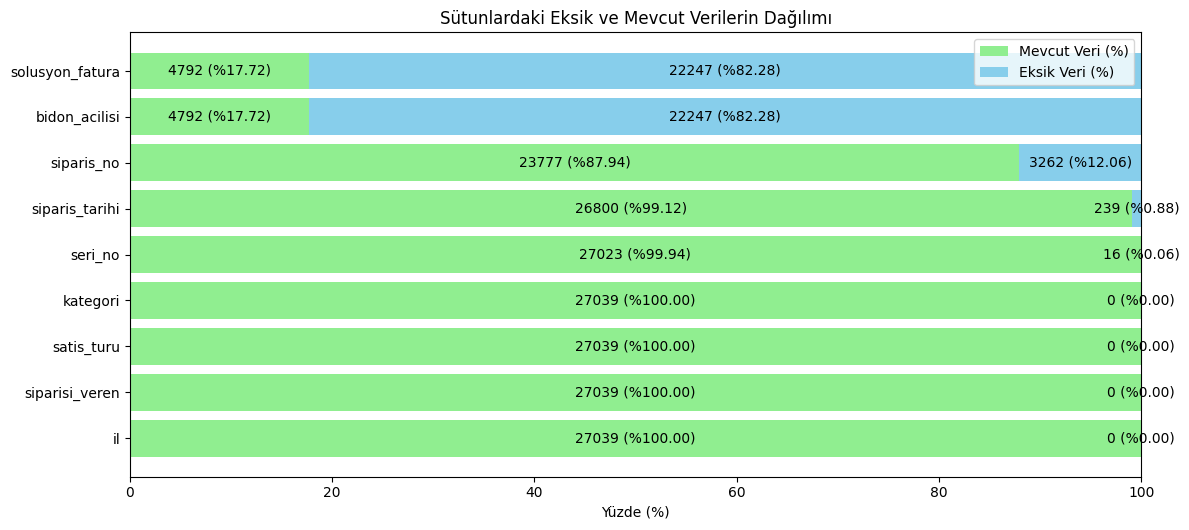

In [51]:
plot_check_null(kartus)

## satis_turu sutunundaki unique degerleri duzenliyoruz

In [52]:
kartus.satis_turu.value_counts()

satis_turu
ÖZEL                8560
İHALE               6906
YURTDIŞI            5962
SATIŞ               3817
DOĞRUDAN TEMİN      1207
ÖZEL_SATIŞ           105
HEDİYE                67
NUMUNE                50
YURT DIŞI             50
İHALE -İŞ ARTIŞI      40
İHALE_SATIŞ           37
ihale                 35
İHALE                 30
HİBE                  22
İHALE SATIŞ           20
PATLAYAN YERİNE       20
İHALE                 20
DEMO                  17
DMO                   15
HİZMET ALIMI          10
ÖZEL                  10
İHALE -HİZMET         10
İHALE                  8
CİHAZIN YANINDA        5
FUAR                   5
ALİ BEY                5
KURULUM                2
satış                  1
İHALE  NUMUNE          1
İHALE NUMUNESİ         1
İHALE- NUMUNESİ        1
Name: count, dtype: int64

In [53]:
kartus[kartus['satis_turu']== 'ALİ BEY']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
12426,KARTUS,ALİ BEY,2022/23,NaN,ALİBEY,ALİBEY,2022/07-740,NaN,NaN
12427,KARTUS,ALİ BEY,2022/23,NaN,ALİBEY,ALİBEY,2022/07-741,NaN,NaN
12428,KARTUS,ALİ BEY,2022/23,NaN,ALİBEY,ALİBEY,2022/07-742,NaN,NaN
12429,KARTUS,ALİ BEY,2022/23,NaN,ALİBEY,ALİBEY,2022/07-743,NaN,NaN
12430,KARTUS,ALİ BEY,2022/23,NaN,ALİBEY,ALİBEY,2022/07-744,NaN,NaN


In [54]:
kartus[kartus['satis_turu']== 'PATLAYAN YERİNE']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
10353,KARTUS,PATLAYAN YERİNE,2021/104,9/22/2021,GÜRCİSTAN,GÜRCİSTAN,2021/07-3184,NaN,NaN
10354,KARTUS,PATLAYAN YERİNE,2021/104,9/22/2021,GÜRCİSTAN,GÜRCİSTAN,2021/07-3185,NaN,NaN
10355,KARTUS,PATLAYAN YERİNE,2021/104,9/22/2021,GÜRCİSTAN,GÜRCİSTAN,2021/07-3186,NaN,NaN
10356,KARTUS,PATLAYAN YERİNE,2021/104,9/22/2021,GÜRCİSTAN,GÜRCİSTAN,2021/07-3187,NaN,NaN
10357,KARTUS,PATLAYAN YERİNE,2021/104,9/22/2021,GÜRCİSTAN,GÜRCİSTAN,2021/07-3188,NaN,NaN
10358,KARTUS,PATLAYAN YERİNE,2021/104,9/22/2021,GÜRCİSTAN,GÜRCİSTAN,2021/07-3189,NaN,NaN
10359,KARTUS,PATLAYAN YERİNE,2021/104,9/22/2021,GÜRCİSTAN,GÜRCİSTAN,2021/07-3190,NaN,NaN
10360,KARTUS,PATLAYAN YERİNE,2021/104,9/22/2021,GÜRCİSTAN,GÜRCİSTAN,2021/07-3191,NaN,NaN
10361,KARTUS,PATLAYAN YERİNE,2021/104,9/22/2021,GÜRCİSTAN,GÜRCİSTAN,2021/07-3192,NaN,NaN
10362,KARTUS,PATLAYAN YERİNE,2021/104,9/22/2021,GÜRCİSTAN,GÜRCİSTAN,2021/07-3193,NaN,NaN


In [55]:
kartus[kartus['satis_turu']== 'CİHAZIN YANINDA']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
7549,KARTUS,CİHAZIN YANINDA,2021/019,2/10/2021,ÖZEL İLKE HASTANESİ,İSTANBUL,2021/07-380,NaN,NaN
7550,KARTUS,CİHAZIN YANINDA,2021/019,2/10/2021,ÖZEL İLKE HASTANESİ,İSTANBUL,2021/07-381,NaN,NaN
7551,KARTUS,CİHAZIN YANINDA,2021/019,2/10/2021,ÖZEL İLKE HASTANESİ,İSTANBUL,2021/07-382,NaN,NaN
7552,KARTUS,CİHAZIN YANINDA,2021/019,2/10/2021,ÖZEL İLKE HASTANESİ,İSTANBUL,2021/07-383,NaN,NaN
7553,KARTUS,CİHAZIN YANINDA,2021/019,2/10/2021,ÖZEL İLKE HASTANESİ,İSTANBUL,2021/07-384,NaN,NaN


In [56]:
kartus = kartus[kartus['satis_turu'] != 'ALİ BEY']
kartus = kartus[kartus['satis_turu'] != 'PATLAYAN YERİNE']
kartus = kartus[kartus['satis_turu'] != 'CİHAZIN YANINDA']

In [57]:
kartus.satis_turu.unique().tolist()

['İHALE_SATIŞ',
 'ÖZEL_SATIŞ',
 'SATIŞ',
 'DEMO',
 'İHALE',
 'YURTDIŞI',
 'ÖZEL',
 'İHALE SATIŞ',
 'DMO',
 'NUMUNE',
 'ihale',
 'HEDİYE',
 'HİBE',
 'satış',
 'DOĞRUDAN TEMİN',
 'İHALE  NUMUNE',
 'İHALE   ',
 'İHALE    ',
 'İHALE NUMUNESİ',
 'İHALE  ',
 'YURT DIŞI',
 'ÖZEL ',
 'İHALE -İŞ ARTIŞI',
 'HİZMET ALIMI',
 'İHALE- NUMUNESİ',
 'FUAR',
 'KURULUM',
 'İHALE -HİZMET']

In [58]:
satis_turu_mapping = {
    'ÖZEL_SATIŞ': 'ÖZEL',
    'satış': 'SATIŞ',
    'YURT DIŞI': 'YURTDIŞI',
    'ihale': 'İHALE',
    'İHALE  ' : 'İHALE',
    'İHALE   ' :'İHALE',
    'İHALE    ' :'İHALE',
    'İHALE -İŞ ARTIŞI': 'İHALE',
    'İHALE_SATIŞ': 'İHALE',
    'İHALE SATIŞ': 'İHALE',
    'İHALE -HİZMET': 'NUMUNE',
    'İHALE  NUMUNE': 'NUMUNE',
    'İHALE NUMUNESİ': 'NUMUNE',
    'İHALE- NUMUNESİ': 'NUMUNE',
    'FUAR' : 'NUMUNE',
    'HİZMET ALIMI' : 'NUMUNE',
    'HEDİYE' : 'NUMUNE',
    'HİBE': 'NUMUNE',
    'ÖZEL ' : 'ÖZEL',
    'KURULUM' : 'NUMUNE',
    'DEMO' : 'NUMUNE',
    'DMO' : 'İHALE'
    
}

# satis_turu sütunundaki değerleri eşleme sözlüğüne göre değiştiriyoruz
kartus['satis_turu'] = kartus['satis_turu'].replace(satis_turu_mapping)

In [59]:
kartus.satis_turu.value_counts()

satis_turu
ÖZEL              8675
İHALE             7111
YURTDIŞI          6012
SATIŞ             3818
DOĞRUDAN TEMİN    1207
NUMUNE             186
Name: count, dtype: int64

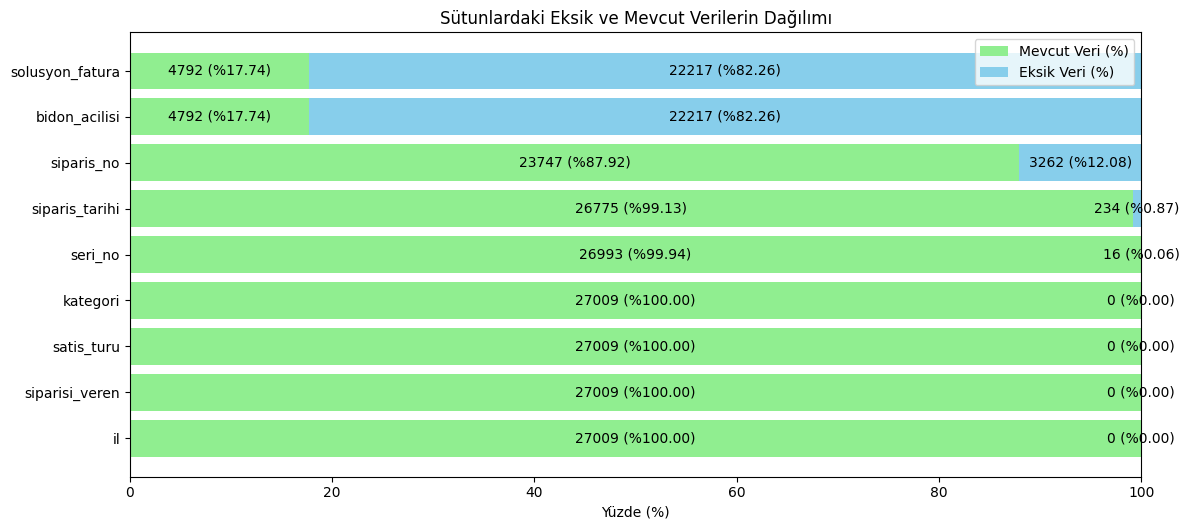

In [60]:
plot_check_null(kartus)

# KALICI SIPARIS TARIHI SUTUNU 

In [61]:
kartus[kartus['siparis_tarihi'].str.contains('AKSARAY', na=False, case=False)]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
16911,KARTUS,ÖZEL,2023/02,AKSARAY,ALYANS MEDİKAL TİC.LTD. ŞTİ.,ANKARA,2022/07-5225,NaN,NaN


In [62]:
kartus[kartus['siparis_no'] == '2023/02']

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
16902,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,ANKARA,2022/07-5216,NaN,NaN
16903,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,ANKARA,2022/07-5217,NaN,NaN
16904,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,ANKARA,2022/07-5218,NaN,NaN
16905,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,ANKARA,2022/07-5219,NaN,NaN
16906,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,ANKARA,2022/07-5220,NaN,NaN
16907,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,ANKARA,2022/07-5221,NaN,NaN
16908,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,ANKARA,2022/07-5222,NaN,NaN
16909,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,ANKARA,2022/07-5223,NaN,NaN
16910,KARTUS,ÖZEL,2023/02,1/6/2023 0:00,ALYANS MEDİKAL TİC.LTD. ŞTİ.,ANKARA,2022/07-5224,NaN,NaN
16911,KARTUS,ÖZEL,2023/02,AKSARAY,ALYANS MEDİKAL TİC.LTD. ŞTİ.,ANKARA,2022/07-5225,NaN,NaN


In [63]:
# 'siparis_tarihi' sütununda 'AKSARAY' olan değeri '1/6/2023 0:00' ile değiştirme
kartus.loc[kartus['siparis_tarihi'] == 'AKSARAY', 'siparis_tarihi'] = '1/6/2023 0:00'

In [64]:
# 2018/005 nolu siparisin tarihinin 1/11/2018 oldugunu goruyoruz.
# bu sebeple 2018/004 nolu siparislerin bu tarihte vevya bu tarihten once oldugunu dusunebiliriz 
# haftaici hafftasonu goz onunde bulndurularak 1/11/2018 tarihinden once olacak sekilde doldurulmustur
# "siparis_no" sütununda "2018/004" olan satırların "siparis_tarihi" değerini "1/10/2018" olarak güncelleme

kartus.loc[kartus["siparis_no"] == "2018/004", "siparis_tarihi"] = "1/10/2018"
kartus.loc[kartus["siparis_no"] == "2018/003", "siparis_tarihi"] = "1/9/2018"
kartus.loc[kartus["siparis_no"] == "2018/002", "siparis_tarihi"] = "1/8/2018"
kartus.loc[kartus["siparis_no"] == "2018/001", "siparis_tarihi"] = "1/5/2018"
kartus.loc[kartus['siparis_no'] == '2022/19', 'siparis_tarihi'] = '14/03/2022'
kartus.loc[kartus['siparis_no'] == '2022/21', 'siparis_tarihi'] = '17/03/2022'
kartus.loc[kartus['siparis_no'] == '2022/22', 'siparis_tarihi'] = '21/03/2022'
kartus.loc[kartus['siparis_no'] == '2022/23', 'siparis_tarihi'] = '22/03/2022'
kartus.loc[kartus['siparis_tarihi'] =='12.0.2024', 'siparis_tarihi'] = '12/8/2024'

In [65]:
kartus[kartus["siparis_tarihi"].isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
12801,KARTUS,ÖZEL,NaN,NaN,DTH- ONKOLOJİ EĞİTİM ARAŞTIRMA HASTANESİ,ANKARA,2022/07-1115,NaN,NaN
12803,KARTUS,ÖZEL,NaN,NaN,DTH- ONKOLOJİ EĞİTİM ARAŞTIRMA HASTANESİ,ANKARA,2022/07-1117,NaN,NaN
12806,KARTUS,ÖZEL,NaN,NaN,DTH- ONKOLOJİ EĞİTİM ARAŞTIRMA HASTANESİ,ANKARA,2022/07-1120,NaN,NaN
12807,KARTUS,ÖZEL,NaN,NaN,DTH- ONKOLOJİ EĞİTİM ARAŞTIRMA HASTANESİ,ANKARA,2022/07-1121,NaN,NaN
12810,KARTUS,ÖZEL,NaN,NaN,DTH- ONKOLOJİ EĞİTİM ARAŞTIRMA HASTANESİ,ANKARA,2022/07-1124,NaN,NaN
...,...,...,...,...,...,...,...,...,...
14987,KARTUS,DOĞRUDAN TEMİN,NaN,NaN,SİLVAN DEVLET HASTANESİ,DİYARBAKIR,2022/07-3301,NaN,NaN
15847,KARTUS,ÖZEL,NaN,NaN,ERYİĞİT- ŞİRKET İÇİ KULLANIM,ANKARA,2022/07-4161,NaN,NaN
15848,KARTUS,ÖZEL,NaN,NaN,ERYİĞİT- ŞİRKET İÇİ KULLANIM,ANKARA,2022/07-4162,NaN,NaN
15849,KARTUS,ÖZEL,NaN,NaN,ERYİĞİT- ŞİRKET İÇİ KULLANIM,ANKARA,2022/07-4163,NaN,NaN


In [66]:
# DAHA ONCE CALISILAN NOTEBOOKLARDA SERI NOLAR BELIRLENMIS(UYGUN SIPARIS NO SU OLMADIGI ICIN URUNLERIN DEGISIM OLDUGU DUSUNULMEKTEDIR) 
#VE MANUEL OLARAK LIST HALINE GETIRILMISTIR
seri_no_values = ['2022/07-1361',
 '2022/07-1362',
 '2022/07-1363',
 '2022/07-1364',
 '2022/07-1365',
 '2022/07-1366',
 '2022/07-3294',
 '2022/07-3295',
 '2022/07-3296',
 '2022/07-3297']
kartus = kartus[~kartus['seri_no'].isin(seri_no_values)] 

In [67]:
# DAHA ONCE CALISILAN NOTEBOOKLARDA SERI NOLAR BELIRLENMIS VE MANUEL OLARAK LIST HALINE GETIRILMISTIR
# sirapis_tarihi null olan seri_no lar belirlendi ve mantikli bir bicimde dolduruldu

seri_no_values1 = ['2022/07-1115',
 '2022/07-1117',
 '2022/07-1120',
 '2022/07-1121',
 '2022/07-1124',
 '2022/07-1130',
 '2022/07-1136',
 '2022/07-1137',
 '2022/07-1138',
 '2022/07-1139',
 '2022/07-1140',
 '2022/07-1146']

seri_no_values2 = ['2022/07-3298',
 '2022/07-3299',
 '2022/07-3300',
 '2022/07-3301']

seri_no_values3 = ['2022/07-4161', '2022/07-4162', '2022/07-4163', '2022/07-4164']

kartus.loc[kartus['seri_no'].isin(seri_no_values1), 'siparis_no'] = '2022/37'
kartus.loc[kartus['seri_no'].isin(seri_no_values1), 'siparis_tarihi'] = '5/11/2022'
kartus.loc[kartus['seri_no'].isin(seri_no_values2), 'siparis_tarihi'] = '10/6/2022'
kartus.loc[kartus['seri_no'].isin(seri_no_values3), 'siparis_tarihi'] = '11/17/2022'

#siparis_nolari ayni olan degerler  onlardan sonra ve once gelen degerlere bakilarak siparis_tarihi sutunu mantikli bir bicimde dolduruldu 
kartus.loc[kartus["siparis_no"] == '2022/45', 'siparis_tarihi'] = '6/06/2022'
kartus.loc[kartus["siparis_no"] == '2022/47', 'siparis_tarihi'] = '6/17/2022'
kartus.loc[kartus["siparis_no"] == '2022/48', 'siparis_tarihi'] = '6/23/2022'

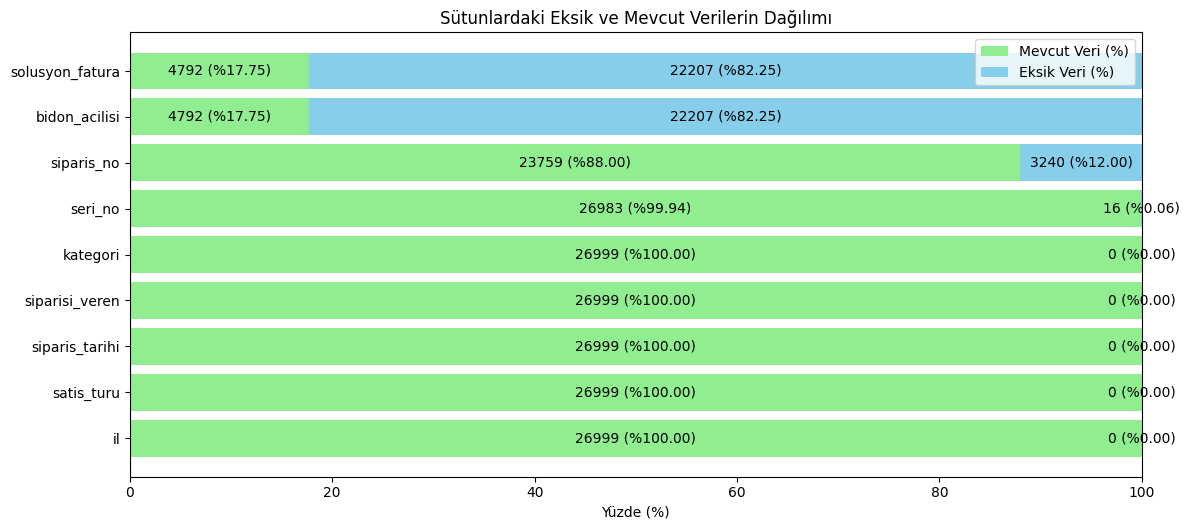

In [68]:
plot_check_null(kartus)

## siparis_tarihi SUTUNUU DATETIME a CEVIRRELIM 

**ONCE DENEME YAPALIM**

In [69]:
ab = kartus.copy()

In [70]:
def convert_to_datetime(date_str):
    try:
        # İlk format: 'ay/gun/yil saat'
        return pd.to_datetime(date_str, format='%m/%d/%Y %H:%M')
    except ValueError:
        try:
            # İkinci format: 'ay/gun/yil'
            return pd.to_datetime(date_str, format='%m/%d/%Y')
        except ValueError:
            return np.nan

# 'siparis_tarihi' sütununu datetime türüne dönüştürme
ab['siparis_tarihi'] = ab['siparis_tarihi'].apply(convert_to_datetime)
ab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26999 entries, 0 to 28880
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   kategori         26999 non-null  object        
 1   satis_turu       26999 non-null  object        
 2   siparis_no       23759 non-null  object        
 3   siparis_tarihi   26949 non-null  datetime64[ns]
 4   siparisi_veren   26999 non-null  object        
 5   il               26999 non-null  object        
 6   seri_no          26983 non-null  object        
 7   solusyon_fatura  4792 non-null   object        
 8   bidon_acilisi    4792 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 2.1+ MB


In [71]:
ab[ab['siparis_tarihi'].isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
12376,KARTUS,YURTDIŞI,2022/22,NaT,ALMANYA,ALMANYA,2022/07-690,NaN,NaN
12377,KARTUS,YURTDIŞI,2022/22,NaT,ALMANYA,ALMANYA,2022/07-691,NaN,NaN
12378,KARTUS,YURTDIŞI,2022/22,NaT,ALMANYA,ALMANYA,2022/07-692,NaN,NaN
12379,KARTUS,YURTDIŞI,2022/22,NaT,ALMANYA,ALMANYA,2022/07-693,NaN,NaN
12380,KARTUS,YURTDIŞI,2022/22,NaT,ALMANYA,ALMANYA,2022/07-694,NaN,NaN
12381,KARTUS,YURTDIŞI,2022/22,NaT,ALMANYA,ALMANYA,2022/07-695,NaN,NaN
12382,KARTUS,YURTDIŞI,2022/22,NaT,ALMANYA,ALMANYA,2022/07-696,NaN,NaN
12383,KARTUS,YURTDIŞI,2022/22,NaT,ALMANYA,ALMANYA,2022/07-697,NaN,NaN
12384,KARTUS,YURTDIŞI,2022/22,NaT,ALMANYA,ALMANYA,2022/07-698,NaN,NaN
12385,KARTUS,YURTDIŞI,2022/22,NaT,ALMANYA,ALMANYA,2022/07-699,NaN,NaN


In [72]:
kartus.loc[12376:12425]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
12376,KARTUS,YURTDIŞI,2022/22,21/03/2022,ALMANYA,ALMANYA,2022/07-690,NaN,NaN
12377,KARTUS,YURTDIŞI,2022/22,21/03/2022,ALMANYA,ALMANYA,2022/07-691,NaN,NaN
12378,KARTUS,YURTDIŞI,2022/22,21/03/2022,ALMANYA,ALMANYA,2022/07-692,NaN,NaN
12379,KARTUS,YURTDIŞI,2022/22,21/03/2022,ALMANYA,ALMANYA,2022/07-693,NaN,NaN
12380,KARTUS,YURTDIŞI,2022/22,21/03/2022,ALMANYA,ALMANYA,2022/07-694,NaN,NaN
12381,KARTUS,YURTDIŞI,2022/22,21/03/2022,ALMANYA,ALMANYA,2022/07-695,NaN,NaN
12382,KARTUS,YURTDIŞI,2022/22,21/03/2022,ALMANYA,ALMANYA,2022/07-696,NaN,NaN
12383,KARTUS,YURTDIŞI,2022/22,21/03/2022,ALMANYA,ALMANYA,2022/07-697,NaN,NaN
12384,KARTUS,YURTDIŞI,2022/22,21/03/2022,ALMANYA,ALMANYA,2022/07-698,NaN,NaN
12385,KARTUS,YURTDIŞI,2022/22,21/03/2022,ALMANYA,ALMANYA,2022/07-699,NaN,NaN


In [73]:
ab.loc[
    (ab['siparis_no'] == '2022/22') & 
    (ab['siparisi_veren'] == 'ALMANYA') & 
    (ab['il'] == 'ALMANYA'), 
    'siparis_tarihi'
] = '03/21/2022'

In [74]:
def convert_to_datetime(date_str):
    try:
        # İlk format: 'ay/gun/yil saat'
        return pd.to_datetime(date_str, format='%m/%d/%Y %H:%M')
    except ValueError:
        try:
            # İkinci format: 'ay/gun/yil'
            return pd.to_datetime(date_str, format='%m/%d/%Y')
        except ValueError:
            return np.nan

# 'siparis_tarihi' sütununu datetime türüne dönüştürme
ab['siparis_tarihi'] = ab['siparis_tarihi'].apply(convert_to_datetime)
ab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26999 entries, 0 to 28880
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   kategori         26999 non-null  object        
 1   satis_turu       26999 non-null  object        
 2   siparis_no       23759 non-null  object        
 3   siparis_tarihi   26999 non-null  datetime64[ns]
 4   siparisi_veren   26999 non-null  object        
 5   il               26999 non-null  object        
 6   seri_no          26983 non-null  object        
 7   solusyon_fatura  4792 non-null   object        
 8   bidon_acilisi    4792 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 3.1+ MB


**SIMDI UYGULAMASINI YAPALIM**

In [75]:
kartus.loc[
    (kartus['siparis_no'] == '2022/22') & 
    (kartus['siparisi_veren'] == 'ALMANYA') & 
    (kartus['il'] == 'ALMANYA'), 
    'siparis_tarihi'
] = '03/21/2022'

In [76]:
def convert_to_datetime(date_str):
    try:
        # İlk format: 'ay/gun/yil saat'
        return pd.to_datetime(date_str, format='%m/%d/%Y %H:%M')
    except ValueError:
        try:
            # İkinci format: 'ay/gun/yil'
            return pd.to_datetime(date_str, format='%m/%d/%Y')
        except ValueError:
            return np.nan

# 'siparis_tarihi' sütununu datetime türüne dönüştürme
kartus['siparis_tarihi'] = kartus['siparis_tarihi'].apply(convert_to_datetime)
kartus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26999 entries, 0 to 28880
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   kategori         26999 non-null  object        
 1   satis_turu       26999 non-null  object        
 2   siparis_no       23759 non-null  object        
 3   siparis_tarihi   26999 non-null  datetime64[ns]
 4   siparisi_veren   26999 non-null  object        
 5   il               26999 non-null  object        
 6   seri_no          26983 non-null  object        
 7   solusyon_fatura  4792 non-null   object        
 8   bidon_acilisi    4792 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 3.1+ MB


# KALICI SERI NO SUTUNU 

In [77]:
kartus[kartus.duplicated(subset=['seri_no'], keep=False)]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
4053,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4054,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4055,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4056,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4057,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4058,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4059,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4060,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4061,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4062,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019


In [78]:
kartus[kartus["seri_no"].isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
4053,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4054,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4055,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4056,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4057,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4058,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4059,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4060,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4061,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019
4062,KARTUS,SATIŞ,2019/113,2019-12-19,IRAK MERİVAN,IRAK,NaN,25.4.2019-HPS2019-00387,10/8/2019


In [79]:
df.loc[5904:5920]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
5904,KARTUS,DEĞİŞİM,2019/112,12/18/2019,ŞANLIURFA EĞİTİM ARAŞTIRMA HASTANESİ,NaN,ŞANLIURFA,NaN,KARTUŞ,NaN,2019/07-2227,NaN,NaN,NaN,DEĞİŞİM,25.4.2019-HPS2019-00387,10/8/2019,NaN
5905,KARTUS,SATIŞ,2019/113,12/19/2019,IRAK MERİVAN,NaN,IRAK,NaN,KARTUŞ,NaN,NaN,NaN,NaN,NaN,SATIŞ,25.4.2019-HPS2019-00387,10/8/2019,NaN
5906,KARTUS,SATIŞ,2019/113,12/19/2019,IRAK MERİVAN,NaN,IRAK,NaN,KARTUŞ,NaN,NaN,NaN,NaN,NaN,SATIŞ,25.4.2019-HPS2019-00387,10/8/2019,NaN
5907,KARTUS,SATIŞ,2019/113,12/19/2019,IRAK MERİVAN,NaN,IRAK,NaN,KARTUŞ,NaN,NaN,NaN,NaN,NaN,SATIŞ,25.4.2019-HPS2019-00387,10/8/2019,NaN
5908,KARTUS,SATIŞ,2019/113,12/19/2019,IRAK MERİVAN,NaN,IRAK,NaN,KARTUŞ,NaN,NaN,NaN,NaN,NaN,SATIŞ,25.4.2019-HPS2019-00387,10/8/2019,NaN
5909,KARTUS,SATIŞ,2019/113,12/19/2019,IRAK MERİVAN,NaN,IRAK,NaN,KARTUŞ,NaN,NaN,NaN,NaN,NaN,SATIŞ,25.4.2019-HPS2019-00387,10/8/2019,NaN
5910,KARTUS,SATIŞ,2019/113,12/19/2019,IRAK MERİVAN,NaN,IRAK,NaN,KARTUŞ,NaN,NaN,NaN,NaN,NaN,SATIŞ,25.4.2019-HPS2019-00387,10/8/2019,NaN
5911,KARTUS,SATIŞ,2019/113,12/19/2019,IRAK MERİVAN,NaN,IRAK,NaN,KARTUŞ,NaN,NaN,NaN,NaN,NaN,SATIŞ,25.4.2019-HPS2019-00387,10/8/2019,NaN
5912,KARTUS,SATIŞ,2019/113,12/19/2019,IRAK MERİVAN,NaN,IRAK,NaN,KARTUŞ,NaN,NaN,NaN,NaN,NaN,SATIŞ,25.4.2019-HPS2019-00387,10/8/2019,NaN
5913,KARTUS,SATIŞ,2019/113,12/19/2019,IRAK MERİVAN,NaN,IRAK,NaN,KARTUŞ,NaN,NaN,NaN,NaN,NaN,SATIŞ,25.4.2019-HPS2019-00387,10/8/2019,NaN


**TUM DATA INCELENDIGINDE IRAK MERİVAN A SATISI GERCEKLESTIGI SOYLENEN URUNLERIN UNIQUE DEGER OLMASI GEREKEN seri_no LARI YOKTUR VE UYGUN BIR DEGER ALMAMAKTADIR BU SEBEBPLE SILINMESI GEREKIR URUNLERIN SATISININ YAPILMADIGI DUSUNULEREK**

In [80]:
kartus = kartus.drop(
    kartus[(kartus['siparis_no'] == '2019/113') &
           (kartus['siparis_tarihi'] == '12/19/2019') &
           (kartus['siparisi_veren'] == 'IRAK MERİVAN')].index
)

In [81]:
# nan deger olan satirdaki siparis tarihi ve siparisi verenin  ayni degere sahip oldugu baska satirlardan yol cikarak nandeger doldurulabilir
kartus[kartus['siparis_tarihi'] == '1/21/2020'] 

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
4364,KARTUS,SATIŞ,2020/014,2020-01-21,A HOSPİTAL,İSTANBUL,2019/07-2234,20.12.2019-GIB2019000016266,1/5/2020
4365,KARTUS,SATIŞ,2020/014,2020-01-21,A HOSPİTAL,İSTANBUL,2019/07-2228,20.12.2019-GIB2019000016266,1/5/2020
4366,KARTUS,SATIŞ,2020/014,2020-01-21,A HOSPİTAL,İSTANBUL,NaN,20.12.2019-GIB2019000016266,1/5/2020
4367,KARTUS,SATIŞ,2020/014,2020-01-21,A HOSPİTAL,İSTANBUL,2019/07-2235,20.12.2019-GIB2019000016266,1/5/2020
4368,KARTUS,SATIŞ,2020/014,2020-01-21,A HOSPİTAL,İSTANBUL,2019/07-2229,20.12.2019-GIB2019000016266,1/5/2020


In [82]:
kartus.loc[
    (kartus['siparis_no'] == '2020/014') &
    (kartus['siparis_tarihi'] == '1/21/2020') &
    (kartus['siparisi_veren'] == 'A HOSPİTAL') &
    (kartus['seri_no'].isna()),
    'seri_no'
] = '2019/07-2231'

In [83]:
kartus[kartus["seri_no"].isnull()]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi


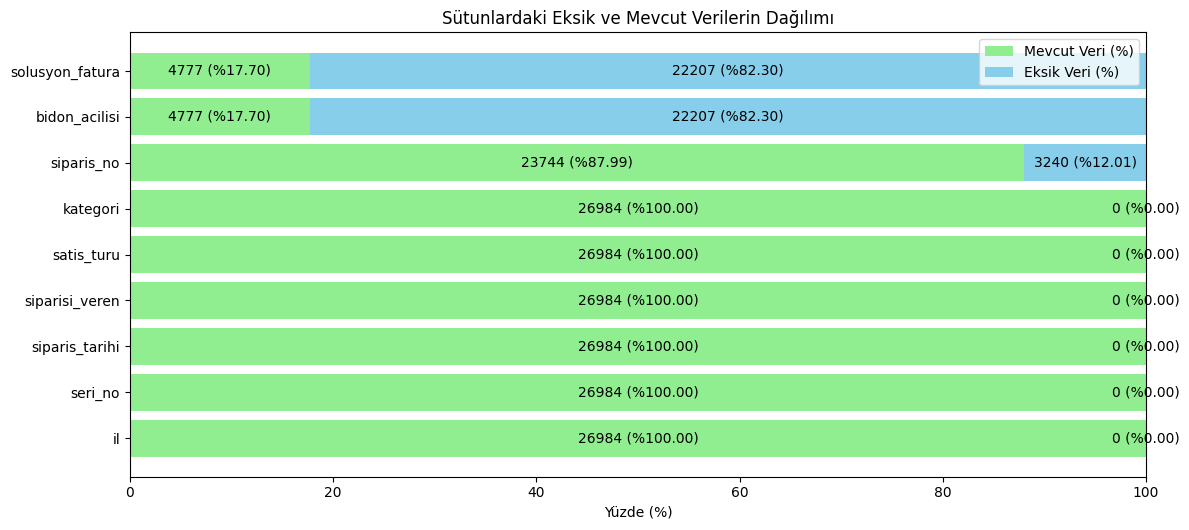

In [84]:
plot_check_null(kartus)

In [85]:
#BU KOD DEMEK OLUYOR KI BU URUNLER BIRBIRININ AYNI SATIRLAR
kartus[kartus.duplicated(subset=['siparis_tarihi', 'seri_no'], keep=False)]

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no,solusyon_fatura,bidon_acilisi
5876,KARTUS,SATIŞ,2020/114,2020-09-03,TOPMED,AZERBEYCAN,2020/07-1474,07.04.2020-KE12020000006221,4/24/2020
5877,KARTUS,SATIŞ,2020/114,2020-09-03,TOPMED,AZERBEYCAN,2020/07-1474,07.04.2020-KE12020000006221,4/24/2020
5878,KARTUS,SATIŞ,2020/114,2020-09-03,TOPMED,AZERBEYCAN,2020/07-1474,07.04.2020-KE12020000006221,4/24/2020
5879,KARTUS,SATIŞ,2020/114,2020-09-03,TOPMED,AZERBEYCAN,2020/07-1474,07.04.2020-KE12020000006221,4/24/2020
5880,KARTUS,SATIŞ,2020/114,2020-09-03,TOPMED,AZERBEYCAN,2020/07-1474,07.04.2020-KE12020000006221,4/24/2020
5881,KARTUS,SATIŞ,2020/114,2020-09-03,TOPMED,AZERBEYCAN,2020/07-1474,07.04.2020-KE12020000006221,4/24/2020
5883,KARTUS,SATIŞ,2020/114,2020-09-03,TOPMED,AZERBEYCAN,2020/07-1474,07.04.2020-KE12020000006221,4/24/2020
23976,KARTUS,YURTDIŞI,2024/18,2024-02-09,RUANDA,RUANDA,2024/07-0751,NaN,NaN
23977,KARTUS,YURTDIŞI,2024/18,2024-02-09,RUANDA,RUANDA,2024/07-0751,NaN,NaN


In [86]:
kartus = kartus.drop_duplicates(subset=['siparis_tarihi', 'seri_no'], keep='first')

# solusyon fatura ve bidon acilisi sutunlari drop edilecek fakat analizlerde kullanilacak

In [87]:
kartus = kartus.drop(['solusyon_fatura', 'bidon_acilisi'], axis=1)
kartus

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,il,seri_no
0,KARTUS,İHALE,2018/001,2018-01-05,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0001
1,KARTUS,İHALE,2018/001,2018-01-05,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0002
2,KARTUS,İHALE,2018/001,2018-01-05,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0003
3,KARTUS,İHALE,2018/001,2018-01-05,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0004
4,KARTUS,İHALE,2018/001,2018-01-05,AKSARAY EĞİTİM VE ARAŞTIRMA HASTANESİ,AKSARAY,2018/07-0005
...,...,...,...,...,...,...,...
28876,KARTUS,İHALE,2024/123,2024-09-11,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5751
28877,KARTUS,İHALE,2024/123,2024-09-11,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5752
28878,KARTUS,İHALE,2024/123,2024-09-11,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5753
28879,KARTUS,İHALE,2024/123,2024-09-11,MAMAK DEVLET HASTANESİ,ANKARA,2024/07-5754


# SATIRLARI GOR KODLARI 